# UAT (Universal Approximation Theorem)

1) 유한한 수의 뉴런을 포함하는 단일 히든 레이어로 구성된 신경망은

2) 히든 레이어의 활성화 함수가 비선형 연속 함수일 경우

3) 임의의 정확도로 모든 연속함수를 근사할 수 있다.

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

## Example.1 Sin function

In [3]:
# dataset for sin function
X_train = np.linspace(-2*np.pi, 2*np.pi, 1000)
y_train = np.sin(X_train)

In [4]:
X_train[:10], y_train[:10]

(array([-6.28318531, -6.27060636, -6.25802741, -6.24544846, -6.23286951,
        -6.22029056, -6.20771161, -6.19513266, -6.18255371, -6.16997476]),
 array([2.44929360e-16, 1.25786178e-02, 2.51552454e-02, 3.77278927e-02,
        5.02945704e-02, 6.28532900e-02, 7.54020646e-02, 8.79389084e-02,
        1.00461838e-01, 1.12968871e-01]))

In [5]:
# data preprocessing (reshape)
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

X_train[:10], y_train[:10]

(array([[-6.28318531],
        [-6.27060636],
        [-6.25802741],
        [-6.24544846],
        [-6.23286951],
        [-6.22029056],
        [-6.20771161],
        [-6.19513266],
        [-6.18255371],
        [-6.16997476]]),
 array([[2.44929360e-16],
        [1.25786178e-02],
        [2.51552454e-02],
        [3.77278927e-02],
        [5.02945704e-02],
        [6.28532900e-02],
        [7.54020646e-02],
        [8.79389084e-02],
        [1.00461838e-01],
        [1.12968871e-01]]))

In [6]:
# test data -> 원 함수를 잘 복원해 내는가?
X_test = np.linspace(-2*np.pi, 2*np.pi, 100)
y_test = np.sin(X_test)

# data prerocessing (reshape)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
X_test[:10], y_test[:10]

(array([[-6.28318531],
        [-6.15625227],
        [-6.02931923],
        [-5.9023862 ],
        [-5.77545316],
        [-5.64852012],
        [-5.52158709],
        [-5.39465405],
        [-5.26772102],
        [-5.14078798]]),
 array([[2.44929360e-16],
        [1.26592454e-01],
        [2.51147987e-01],
        [3.71662456e-01],
        [4.86196736e-01],
        [5.92907929e-01],
        [6.90079011e-01],
        [7.76146464e-01],
        [8.49725430e-01],
        [9.09631995e-01]]))

d:\projects\github\learning\recommendation\recommendation\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


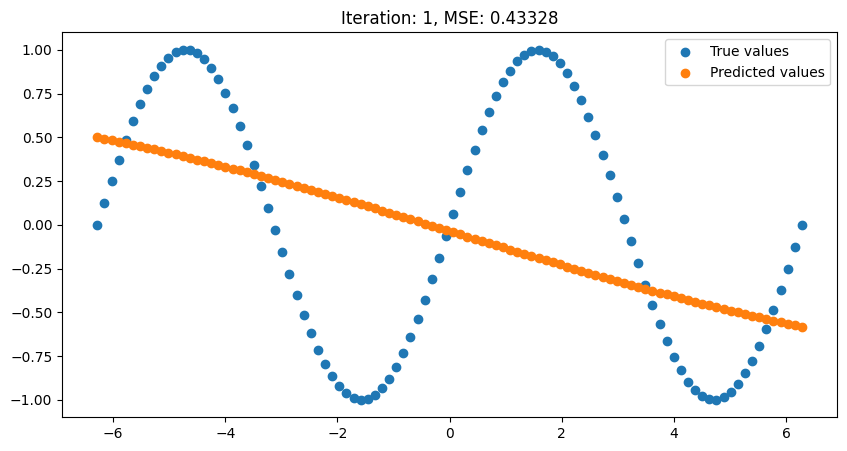

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


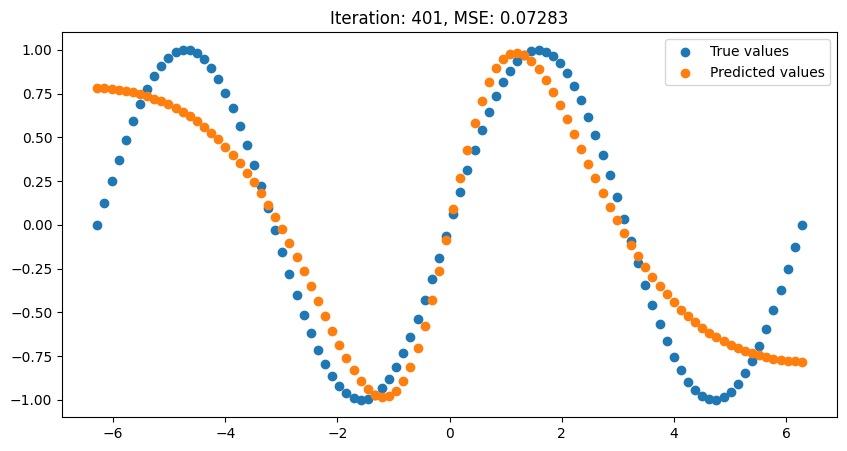

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step


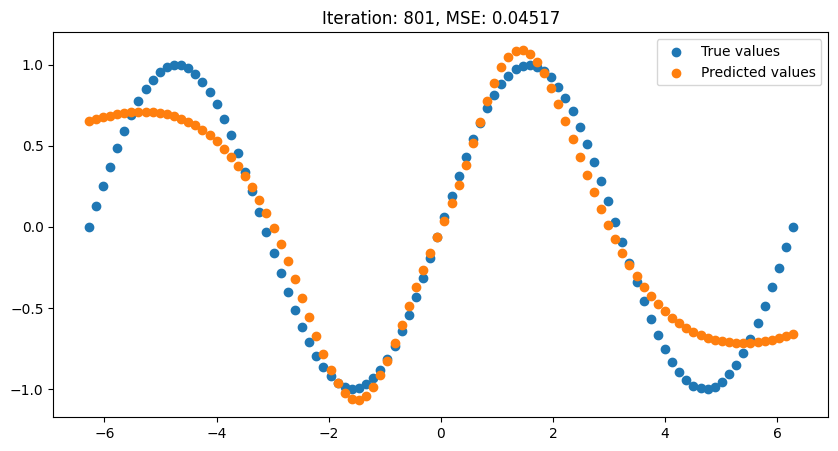

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


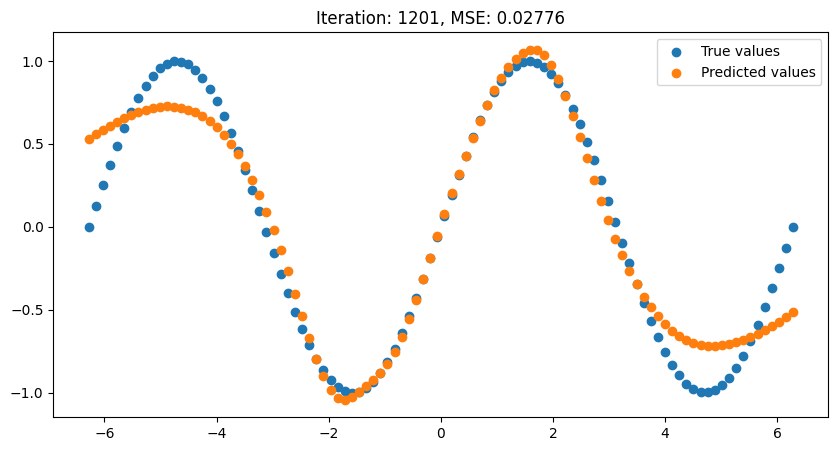

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


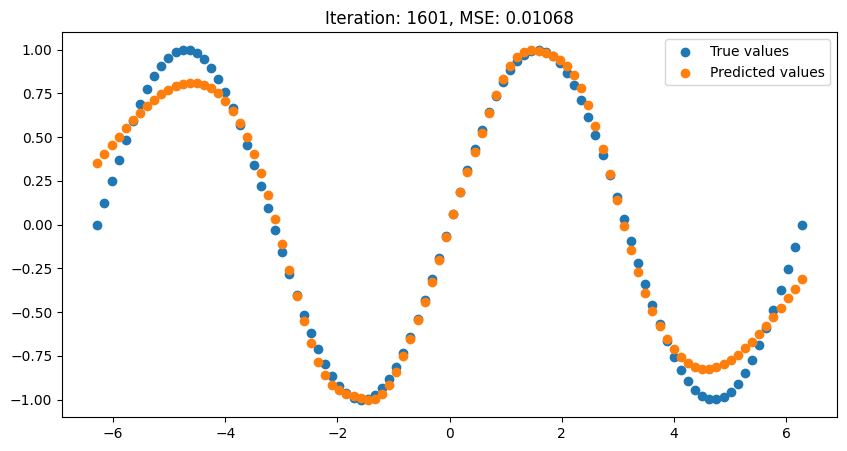

In [7]:
# init model -> one hidden layer
model = Sequential()
model.add(Dense(50, input_dim=1, activation='sigmoid'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model and visualize the prediction
for i in range(2000):
    model.fit(X_train, y_train, epochs=1, verbose=0)
    if i % 400 == 0:
        y_pred = model.predict(X_test)
        plt.figure(figsize=(10, 5))
        plt.scatter(X_test, y_test, label='True values')
        plt.scatter(X_test, y_pred, label='Predicted values')
        mse = mean_squared_error(y_test, y_pred)
        plt.title(f'Iteration: {i+1}, MSE: {mse:.5f}')
        plt.legend()
        plt.show()

In [8]:
trainable_parameters = model.trainable_variables

# print parameters
for parameter in trainable_parameters:
    print(parameter.numpy())
    print(parameter.name, parameter.shape)

[[-2.072839   -1.0012554   1.1471748   1.3035715   0.23547778 -1.1193194
  -0.9663134   1.024069    0.23525581 -1.09289    -1.2381591  -0.9686908
  -1.0209372   0.23847912 -0.98325413 -1.126524   -1.0180707  -1.0420192
  -0.2371613  -1.0758475  -2.5830941   1.0474293  -0.23741953 -1.4217564
  -1.1717435  -0.97176796 -2.6273038  -2.0325506   0.23459877  0.23627445
  -0.2442012   1.5274802  -0.9819086  -1.1361681  -1.0712084   0.23458041
   1.2193834   1.147616    1.091724    2.6810126  -2.062646    1.2332299
  -2.8606522  -1.1331419   1.1183251   1.020042   -3.7966826   0.24391109
  -0.23810713  1.3684479 ]]
kernel (1, 50)
[ 2.2353675  -1.1971842  -2.2552776  -3.5647588  -0.25475043 -2.3947272
 -0.36150485 -0.8388825   0.12843329 -2.1674657  -3.2969368  -0.52725196
 -1.4457611  -0.3549064  -0.91526216  2.038001   -1.4101785   1.0573205
 -0.20205428 -2.0119827  -2.6767461  -1.142911   -0.21036394 -4.4620605
 -2.8136535  -0.6476674  -2.9709477   1.9518197   0.09645201 -0.28564617
 -0.3752

## Example 2.

In [9]:
# define a function
def strange_function(x):
    return np.abs(x) * np.sin(x)

# generate training data
X_train = np.linspace(-10, 10, 1000)
y_train = strange_function(X_train)

# generate test data
x_test = np.linspace(-10, 10, 100)
y_test = strange_function(x_test)

d:\projects\github\learning\recommendation\recommendation\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


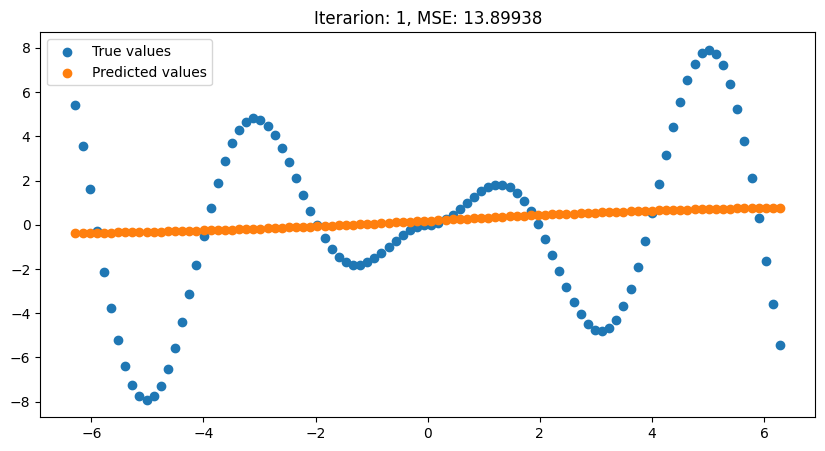

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


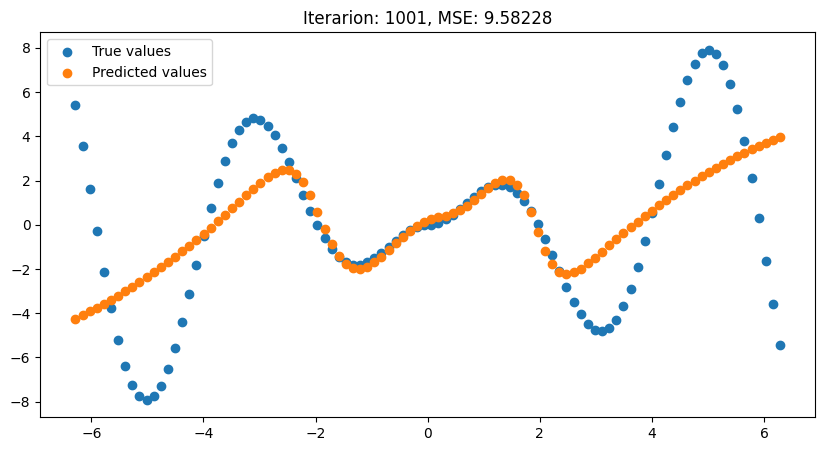

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step


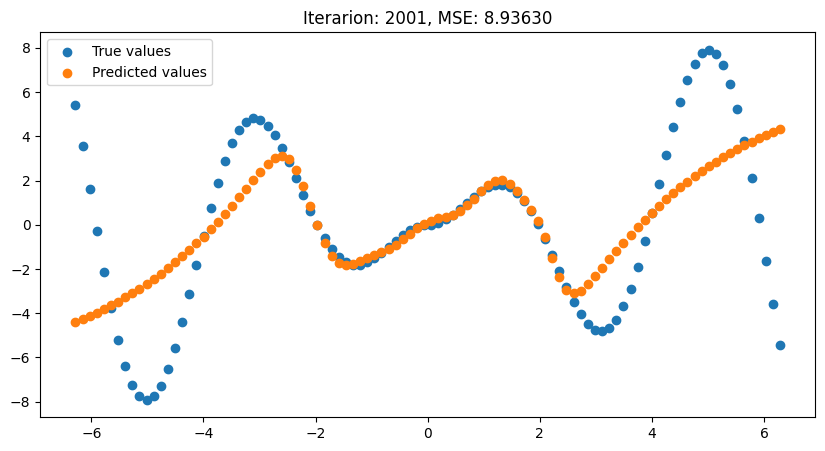

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step


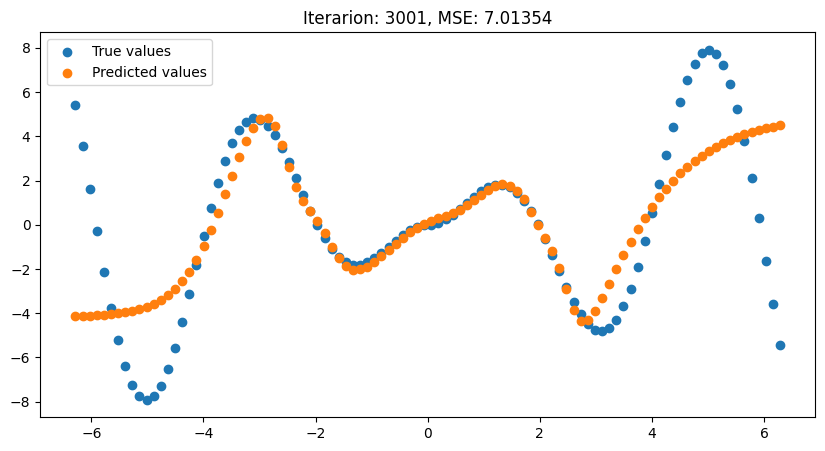

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step


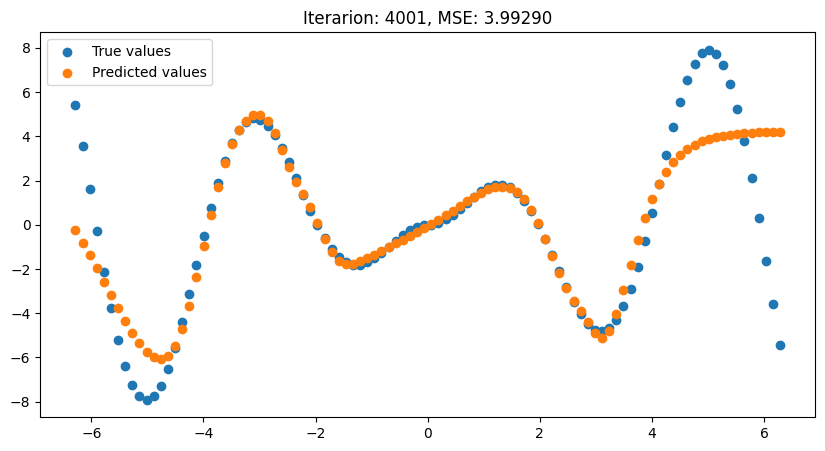

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


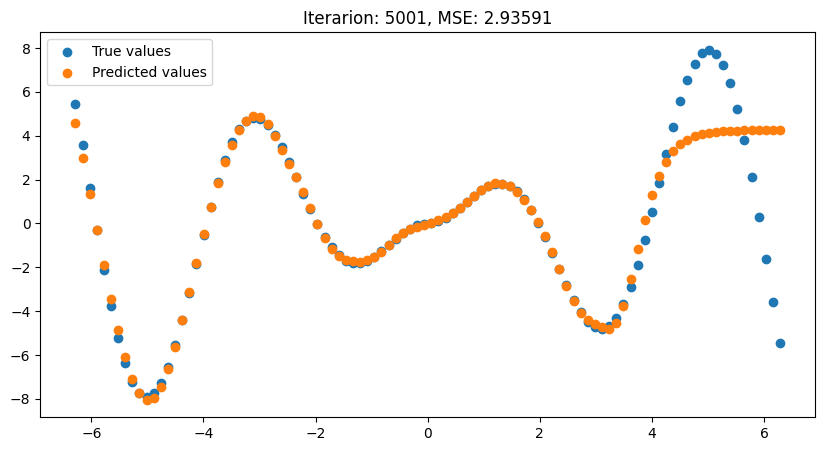

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


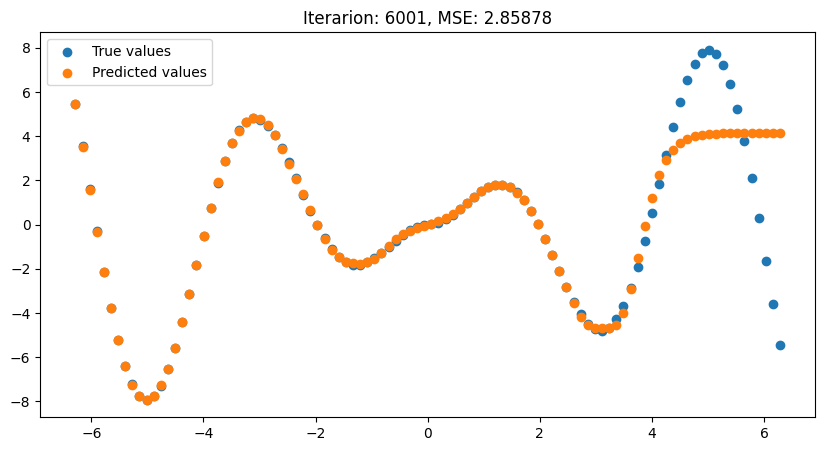

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step


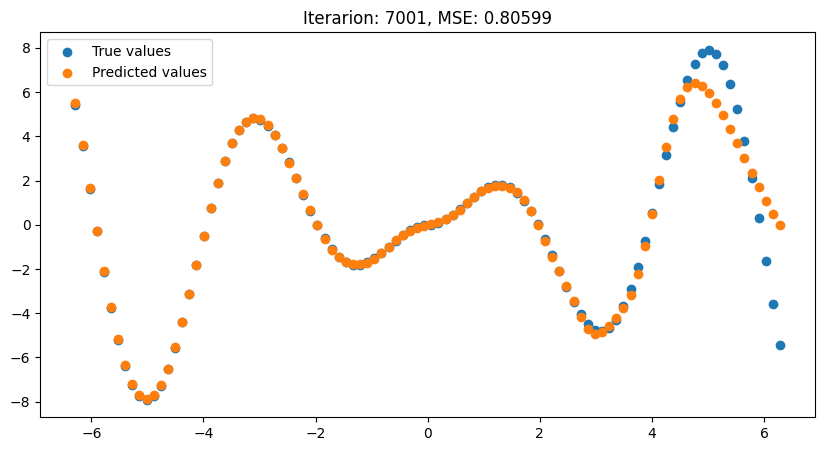

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step


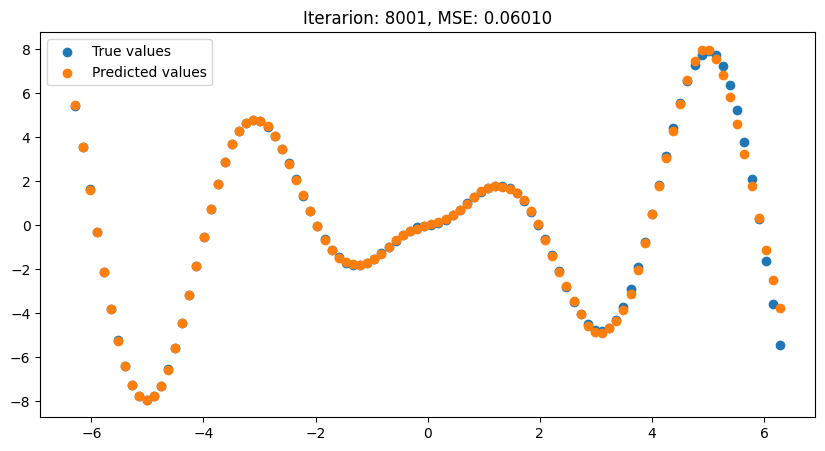

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


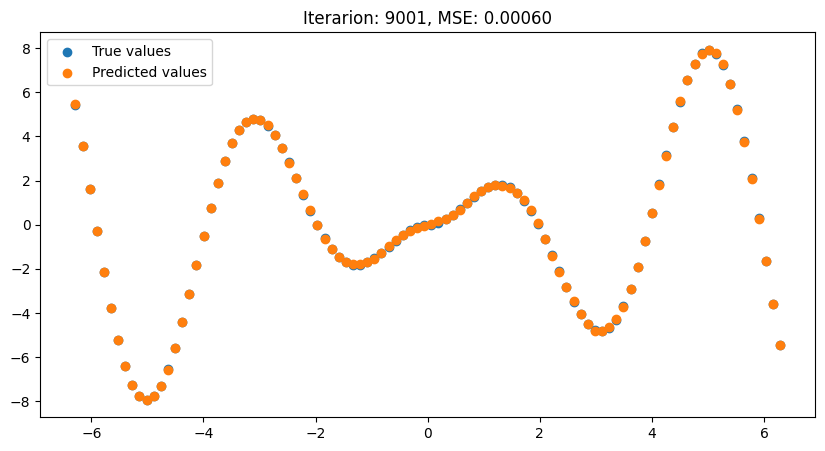

In [11]:
# model initialization
model = Sequential()
model.add(Dense(50, input_dim=1, activation='sigmoid'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model and plot prediction after every 100 epochs
for i in range(10000):
    model.fit(X_train, y_train, epochs=1, verbose=0)
    if i % 1000 == 0:
        y_pred = model.predict(x_test)
        plt.figure(figsize=(10, 5))
        plt.scatter(X_test, y_test, label='True values')
        plt.scatter(X_test, y_pred, label='Predicted values')
        mse = mean_squared_error(y_test, y_pred)
        plt.title(f'Iterarion: {i+1}, MSE: {mse:.5f}')
        plt.legend()
        plt.show()

In [ ]:
trainable_parameters = model.trainable_variables

# print parameters
for parameter in trainable_parameters: 
    
    print(parameter.value())
    print(parameter.name, parameter.shape)

TypeError: 'ResourceVariable' object is not callable